Introduction
Dans ce notebook, nous explorons l'utilisation de la méthode de lissage exponentiel pour la prévision des séries temporelles. Le lissage exponentiel est une technique de prévision qui utilise une moyenne pondérée des observations passées, où les poids décroissent de manière exponentielle au fil du temps. Cette méthode est particulièrement utile pour les données présentant des tendances et des variations saisonnières.


Objectifs du notebook :
-Chargement et Préparation des Données : Importer les bibliothèques nécessaires. Charger les données de séries temporelles à partir d'un fichier CSV. Préparer les données en supprimant les colonnes inutiles et en les formatant correctement.
-Exploration des Données : Visualiser les données historiques pour comprendre les tendances et les variations saisonnières.
-Application du Modèle de Lissage Exponentiel : Utiliser la bibliothèque statsmodels pour appliquer le modèle de lissage exponentiel aux données. Ajuster le modèle pour capturer les tendances et les variations saisonnières.
-Prévision des Valeurs Futures : Utiliser le modèle ajusté pour prévoir les valeurs futures des séries temporelles. Visualiser les prévisions et les comparer aux valeurs historiques. 
-Évaluation du Modèle : Évaluer la performance du modèle en utilisant des métriques de prévision appropriées. Comparer les prévisions du modèle avec les valeurs réelles pour évaluer sa précision.

In [10]:
%config Completer.use_jedi=False
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error
%matplotlib inline

In [11]:
serie_biv= pd.read_csv('C:/Users/Usuario/Desktop/Series/serie_biv.csv')

In [12]:
display(serie_biv)

,month,Num_Acc,Nb_morts
0,2005-03-01,10144,151
1,2005-04-01,10313,135
2,2005-05-01,12102,166
3,2005-06-01,12972,196
4,2005-07-01,12180,295
...,...,...,...
143,2017-02-01,6097,152
144,2017-03-01,7828,197
145,2017-04-01,7950,182
146,2017-05-01,7999,221


In [13]:
serie_biv=serie_biv.drop('month',axis=1)

In [14]:
display(serie_biv)

,Num_Acc,Nb_morts
0,10144,151
1,10313,135
2,12102,166
3,12972,196
4,12180,295
...,...,...
143,6097,152
144,7828,197
145,7950,182
146,7999,221


In [16]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

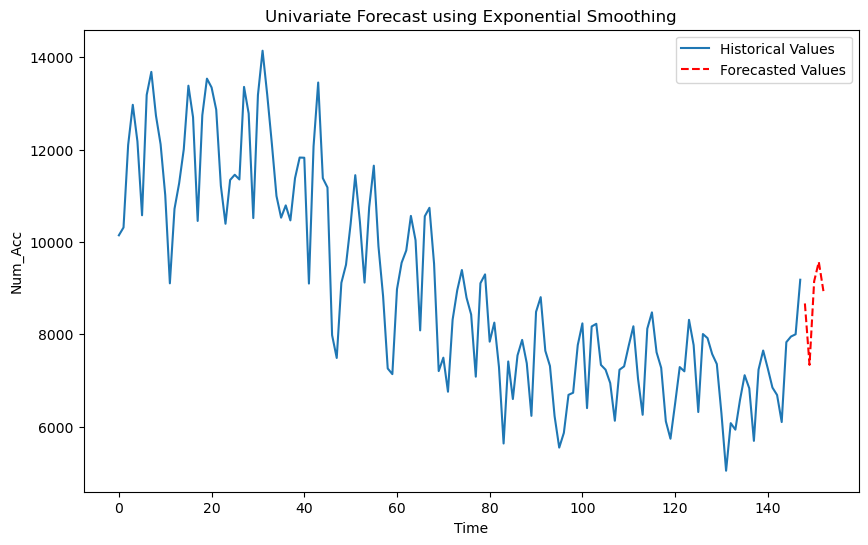

In [17]:
data =serie_biv
# Fit le modele Exponential Smoothing
model = ExponentialSmoothing(data['Num_Acc'], seasonal='add', seasonal_periods=12)
model_fit = model.fit()
# Forecast les valeurs futures 
forecast = model_fit.forecast(steps=5)
# Plot les forecasted values
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Num_Acc'], label='Historical Values')
plt.plot(range(len(data), len(data) + 5), forecast, 'r--', label='Forecasted Values')
plt.legend()
plt.title('Univariate Forecast using Exponential Smoothing')
plt.xlabel('Time')
plt.ylabel('Num_Acc')
plt.show()

In [18]:
# Évaluation du modèle
# Calcul des prévisions sur les données d'entraînement pour évaluation
train_predictions = model_fit.fittedvalues
# Calcul des métriques d'évaluation
rmse = np.sqrt(mean_squared_error(data['Num_Acc'], train_predictions))
mae = mean_absolute_error(data['Num_Acc'], train_predictions)
mape = np.mean(np.abs((data['Num_Acc'] - train_predictions) / data['Num_Acc'])) * 100
# Affichage des métriques d'évaluation
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}%')

RMSE: 540.5057127870764
MAE: 409.9942478529423
MAPE: 4.871960973925667%


Interpretatiom:
RMSE et MAE : Les valeurs de RMSE (540.51) et de MAE (409.99) montrent que les prédictions du modèle ont une erreur moyenne relativement élevée en termes d'unités. Cela suggère qu'il pourrait y avoir des améliorations possibles pour réduire ces erreurs.
MAPE : Une valeur de MAPE de 4.87% est assez bonne, indiquant que les prédictions du modèle sont en moyenne à moins de 5% des valeurs réelles. Cela montre que le modèle est relativement précis en termes de pourcentage.
En résumé, bien que les erreurs absolues (RMSE et MAE) soient relativement élevées, le faible MAPE indique que le modèle de lissage exponentiel est assez précis en termes de pourcentage. Cependant, il pourrait être utile d'explorer d'autres modèles ou d'ajuster les paramètres du modèle actuel pour améliorer encore la précision des prédictions.

In [ ]:
Serie accidents originale sans corriger


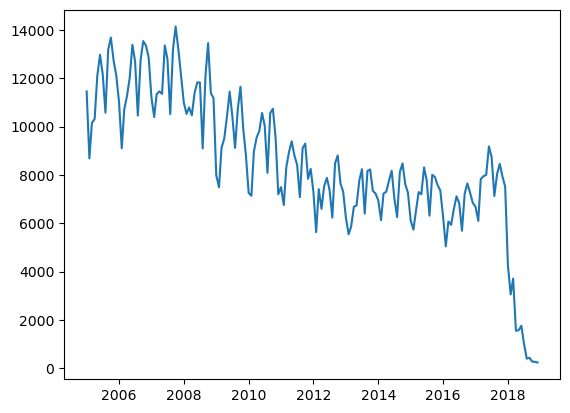

In [ ]:
Serie morts originale sans corriger

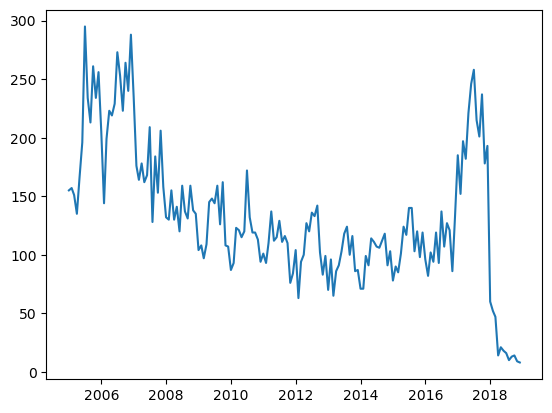

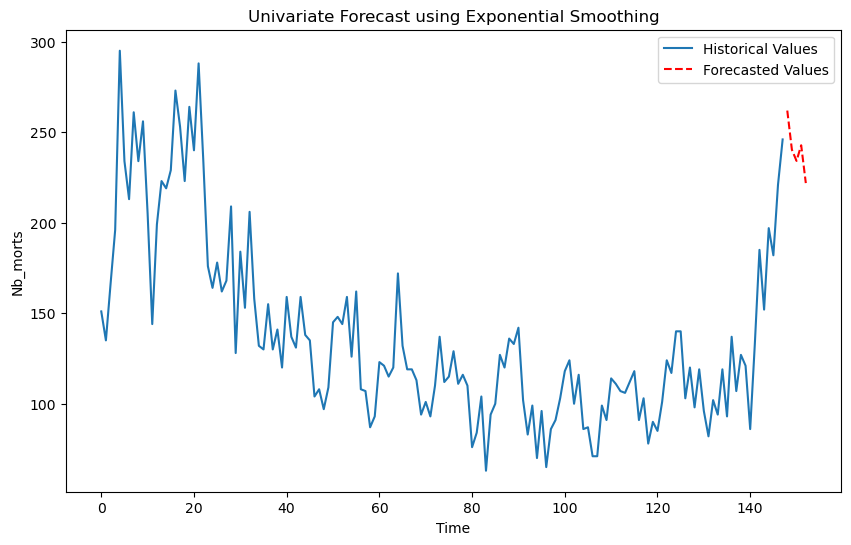

In [19]:
data =serie_biv
# Fit le modele Exponential Smoothing
model = ExponentialSmoothing(data['Nb_morts'], seasonal='add', seasonal_periods=12)
model_fit = model.fit()
# Forecast les values futures
forecast = model_fit.forecast(steps=5)
# Plot les forecasted values
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Nb_morts'], label='Historical Values')
plt.plot(range(len(data), len(data) + 5), forecast, 'r--', label='Forecasted Values')
plt.legend()
plt.title('Univariate Forecast using Exponential Smoothing')
plt.xlabel('Time')
plt.ylabel('Nb_morts')
plt.show()

In [20]:
train_predictions = model_fit.fittedvalues
rmse = np.sqrt(mean_squared_error(data['Nb_morts'], train_predictions))
mae = mean_absolute_error(data['Nb_morts'], train_predictions)
mape = np.mean(np.abs((data['Nb_morts'] - train_predictions) / data['Nb_morts'])) * 100

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}%')

RMSE: 22.186295667391015
MAE: 16.778081056804858
MAPE: 12.525307483322242%


Interpretation:
RMSE et MAE : Les valeurs de RMSE (22.19) et de MAE (16.78) montrent que les prédictions du modèle ont une erreur moyenne modérée en termes d'unités. Cela suggère que le modèle a une performance acceptable mais qu'il pourrait être amélioré pour réduire ces erreurs.
MAPE : Une valeur de MAPE de 12.53% est relativement élevée, indiquant que les prédictions du modèle s'écartent en moyenne de 12.53% des valeurs réelles. Cela montre que le modèle pourrait être amélioré pour obtenir des prédictions plus précises en termes de pourcentage.
En résumé, bien que les erreurs absolues (RMSE et MAE) soient modérées, le MAPE relativement élevé indique que le modèle de lissage exponentiel pourrait être amélioré pour obtenir des prédictions plus précises. Il pourrait être utile d'explorer d'autres modèles ou d'ajuster les paramètres du modèle actuel pour améliorer encore la précision des prédictions.

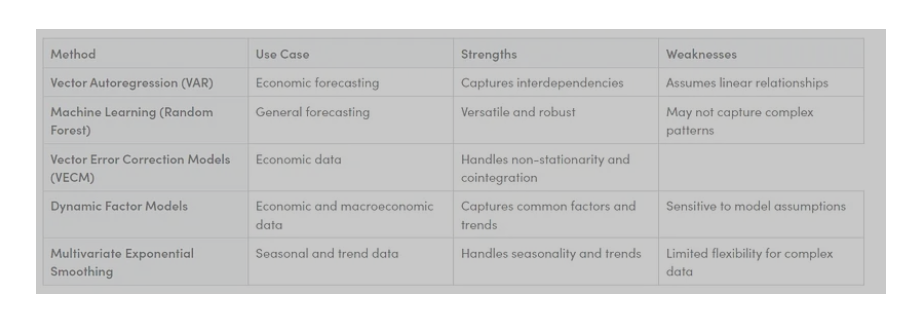

 Conclusion
 Le choix de la méthode appropriée dépend de vos données spécifiques et de vos objectifs de prévision.